In [40]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as pt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [41]:
url="iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pandas.read_csv(url,names=names)

In [42]:
print(dataset.shape)

(150, 5)


In [9]:
print(dataset.head(30))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [22]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [26]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


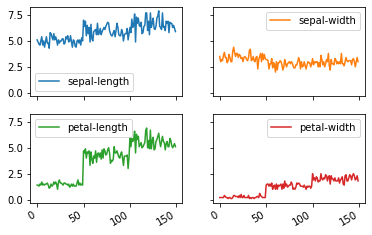

In [44]:
#univariant plot
dataset.plot( subplots=True, layout=(2,2), sharex =True, sharey =True)
pt.show()

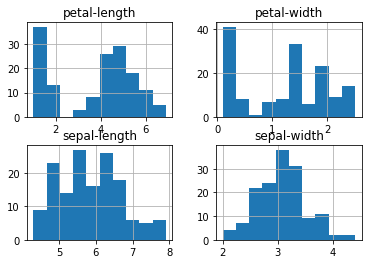

In [45]:
#historgram
dataset.hist()
pt.show()

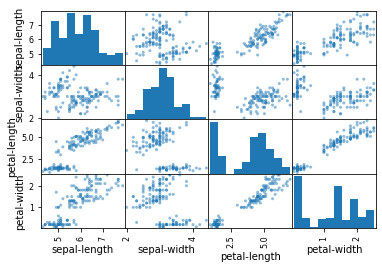

In [39]:
#moving to multivariant plot
#scatter_matrix output is like diagonal grouping of some pairs it suggests high corelation and predictable relationship
scatter_matrix(dataset)
plt.show()

In [46]:
#creating validation(training dataset)
#splitiing loaded data into two parts first 80% will be used to train the data and rest 20% will be used to verify our train model
array=dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed =6
X_train ,X_test,Y_train,Y_test =model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [47]:
#creating_test harness we will use 10 fold cross validation test for accuracy
seed=6
scoring='accuracy'

In [50]:
#checking accuracy of different alogorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#evaluating each model in turn
result=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=None)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg="%s : %f  (%f)"   %  (name,cv_results.mean(),cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LR : 0.950000  (0.076376)
LDA : 0.975000  (0.038188)
KNN : 0.958333  (0.055902)
CART : 0.933333  (0.072648)
NB : 0.966667  (0.055277)
SVM : 0.950000  (0.076376)


AttributeError: 'AxesSubplot' object has no attribute 'set_xsticklabels'

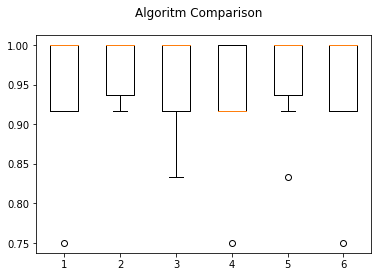

In [51]:
#compare algorithms
fig=pt.figure()
fig.suptitle('Algoritm Comparison')
ax=fig.add_subplot(111)
pt.boxplot(result)
ax.set_xsticklabels(names)
pt.show()




